In [1]:
from sklearn.datasets import load_diabetes, load_digits
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/bank-full.csv",sep=";")

In [4]:
pd.DataFrame(df.mean(axis=0), columns=["siema"])

C:\Users\annaw\AppData\Local\Temp/ipykernel_18904/3823419453.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df.mean(axis=0), columns=["siema"])


,siema
age,40.936210
balance,1362.272058
day,15.806419
duration,258.163080
campaign,2.763841
pdays,40.197828
previous,0.580323


In [5]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [6]:
X_raw, y_raw = load_diabetes(return_X_y=True)
X = X_raw

In [7]:
X.shape

(442, 10)

In [8]:
import numpy as np
from goodpoints import kt, compress
from scipy.stats import wasserstein_distance

In [9]:
def kernel_gaussian(y, X, sigma=1):
    k_vals = np.sum((X-y)**2, axis=1)
    scale = 2*sigma**2
    return(np.exp(-scale*k_vals))

In [10]:
results = []
for seed in range(50):

    id_compressed = kt.thin(X, m=3, split_kernel=kernel_gaussian, swap_kernel=kernel_gaussian, seed=seed)
    np.random.seed(seed)
    id_random = np.random.choice(X.shape[0], size=len(id_compressed))

    X_compressed = X[id_compressed]
    X_random = X[id_random]

    WD_compressed = np.sum([wasserstein_distance(X[:, i], X_compressed[:, i]) for i in range(X.shape[1])])
    WD_random = np.sum([wasserstein_distance(X[:, i], X_random[:, i]) for i in range(X.shape[1])])

    results += [WD_random - WD_compressed]

In [11]:
import matplotlib.pyplot as plt

In [12]:
np.mean(results)

0.030985480772989904

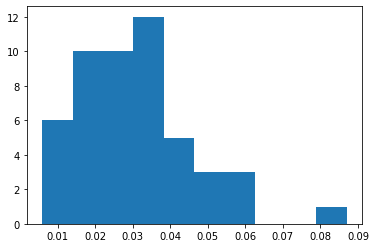

In [17]:
_ = plt.hist(results)

In [167]:
id_compressed = kt.thin(X, m=3, split_kernel=kernel_gaussian, swap_kernel=kernel_gaussian, seed=seed)

In [185]:
y_raw[id_compressed]

array([126., 124., 145., 200., 151., 202., 252.,  78.,  71., 202.,  55.,
       168., 302., 191., 281.,  84., 160., 107.,  88., 107., 220.,  47.,
       151.,  79., 164.,  39.,  70., 185.,  53., 196., 125., 243., 103.,
       118.,  94.,  60.,  85., 198., 253., 190., 230., 270., 214.,  72.,
        60., 281., 123.,  52., 201., 242.,  72., 261., 146., 310.,  48.])

In [173]:
X_raw, y_raw = load_digits(return_X_y=True)
X = StandardScaler().fit_transform(X_raw)

def kernel_polynomial(y, X, degree=2):
    k_vals = np.sum(X*y, axis=1)
    return((k_vals + 1)**degree)

results_mnist = []
for seed in range(25):

    id_compressed = kt.thin(X, m=3, split_kernel=kernel_polynomial, swap_kernel=kernel_polynomial, seed=seed)
    np.random.seed(seed)
    id_random = np.random.choice(X.shape[0], size=len(id_compressed))

    X_compressed = X[id_compressed]
    X_random = X[id_random]

    WD_compressed = np.sum([wasserstein_distance(X[:, i], X_compressed[:, i]) for i in range(X.shape[1])])
    WD_random = np.sum([wasserstein_distance(X[:, i], X_random[:, i]) for i in range(X.shape[1])])

    results_mnist += [WD_random - WD_compressed]

In [174]:
np.mean(results_mnist)

1.668803294941683

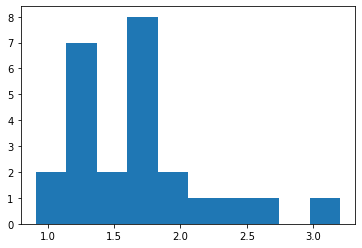

In [175]:
_ = plt.hist(results_mnist)

In [215]:
X.duration

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64